In [1]:
import pandas as pd
import numpy as np
import utm
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Crime Data
crime = pd.read_csv('crime.csv')

In [3]:
#crime.info()

In [4]:
#crime.head()

In [5]:
# For time series analysis
crime.index = pd.DatetimeIndex(crime['DATE'])

In [6]:
#crime.head()

Q. Has the rate of theft from vehicle changed over the years?

In [7]:
annual_crime=crime.groupby([crime["YEAR"]]).size().to_frame().reset_index().rename(columns={0:"Count"})
#annual_crime.head()


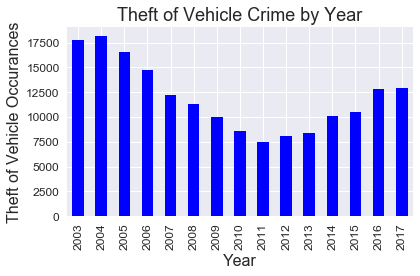

In [8]:
plt.figure(figsize =(8,10))
sns.set(style = 'darkgrid')
annual_crime.plot(kind = "bar", x=['YEAR'], y = "Count",color = "blue", linewidth = 8, legend = False)
plt.title('Theft of Vehicle Crime by Year', size =18)
plt.ylabel('Theft of Vehicle Occurances', size =16)
plt.xlabel('Year',size =16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('TheftbyyearBAr.png',dpi=100,alpha=True)
plt.show()

Q. Is there a difference in the montly reported theft from vehicle over the years

In [9]:
monthly_crime = crime.groupby([crime['YEAR'],crime['MONTH']]).size().to_frame().reset_index().rename(columns={0:'Count'})
#monthly_crime.head(20)


In [10]:
crime_03 = monthly_crime[monthly_crime['YEAR']==2003]
crime_04 = monthly_crime[monthly_crime['YEAR']==2004]
crime_05 = monthly_crime[monthly_crime['YEAR']==2005]
crime_06 = monthly_crime[monthly_crime['YEAR']==2006]
crime_07 = monthly_crime[monthly_crime['YEAR']==2007]
crime_08 = monthly_crime[monthly_crime['YEAR']==2008]
crime_09 = monthly_crime[monthly_crime['YEAR']==2009]
crime_10 = monthly_crime[monthly_crime['YEAR']==2010]
crime_11 = monthly_crime[monthly_crime['YEAR']==2011]
crime_12 = monthly_crime[monthly_crime['YEAR']==2012]
crime_13 = monthly_crime[monthly_crime['YEAR']==2013]
crime_14 = monthly_crime[monthly_crime['YEAR']==2014]
crime_15 = monthly_crime[monthly_crime['YEAR']==2015]
crime_16 = monthly_crime[monthly_crime['YEAR']==2016]
crime_17 = monthly_crime[monthly_crime['YEAR']==2016]

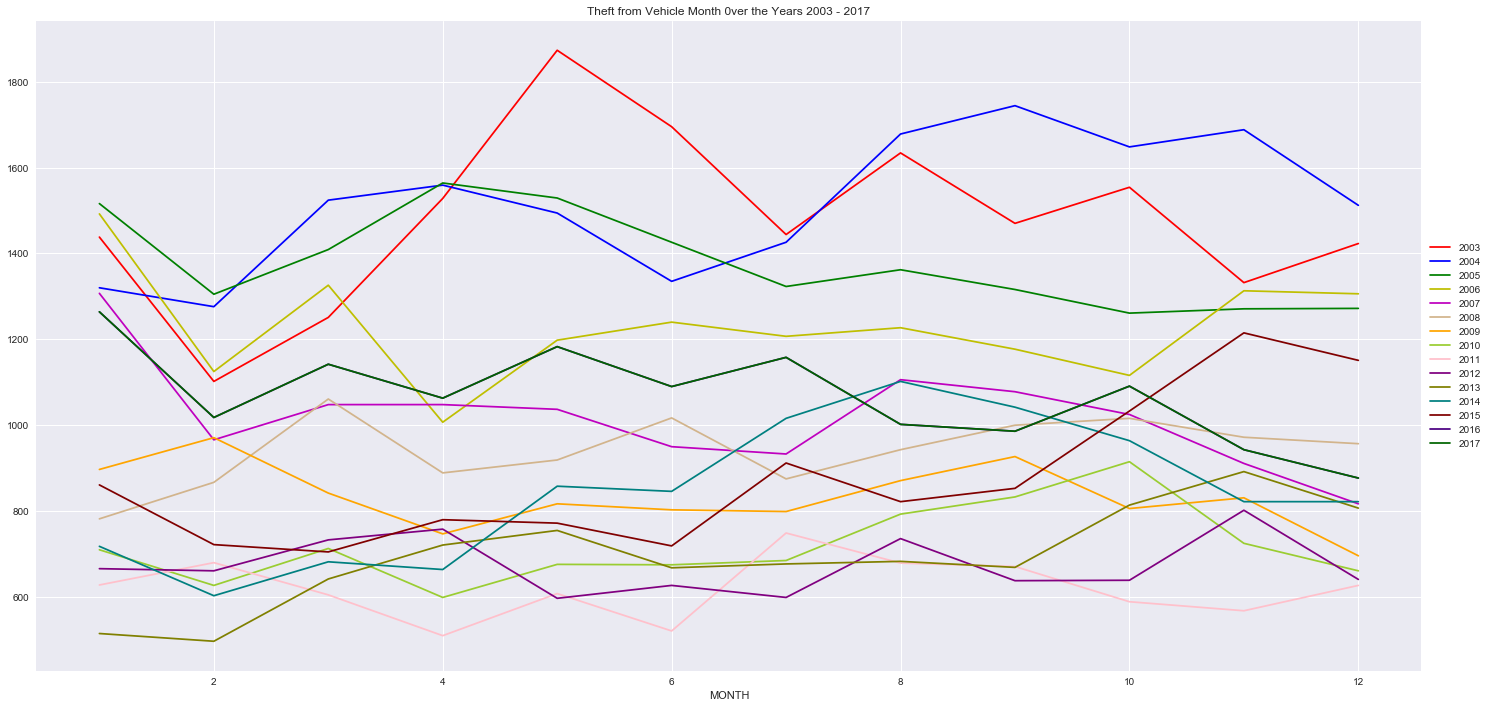

In [11]:
plt.figure(figsize = (20,10))
ax = plt.gca()
crime_03.plot(kind='line',x='MONTH',y='Count',color ='r', ax=ax)
crime_04.plot(kind='line',x='MONTH',y='Count',color ='b', ax=ax)
crime_05.plot(kind='line',x='MONTH',y='Count', color ='g',ax=ax)
crime_06.plot(kind='line',x='MONTH',y='Count',color ='y', ax=ax)
crime_07.plot(kind='line',x='MONTH',y='Count',color ='m', ax=ax)
crime_08.plot(kind='line',x='MONTH',y='Count',color ='tan' ,ax=ax)
crime_09.plot(kind='line',x='MONTH',y='Count',color = 'orange', ax=ax)
crime_10.plot(kind='line',x='MONTH',y='Count',color = 'yellowgreen', ax=ax)
crime_11.plot(kind='line',x='MONTH',y='Count',color ='pink', ax=ax)
crime_12.plot(kind='line',x='MONTH',y='Count',color ='purple', ax=ax)
crime_13.plot(kind='line',x='MONTH',y='Count',color =  'olive',ax=ax)
crime_14.plot(kind='line',x='MONTH',y='Count',color = 'teal',ax=ax)
crime_15.plot(kind='line',x='MONTH',y='Count',color ='maroon' ,ax=ax)
crime_16.plot(kind='line',x='MONTH',y='Count',color ='indigo',ax=ax)
crime_17.plot(kind='line',x='MONTH',y='Count',color ='darkgreen', ax=ax)
ax.legend(['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Theft from Vehicle Month 0ver the Years 2003 - 2017')
plt.tight_layout()
plt.savefig('Monthlychangeyears',dpi=100,alpha=True)
plt.show()



Q.What is the distribution of theft from vehicel crimes per day

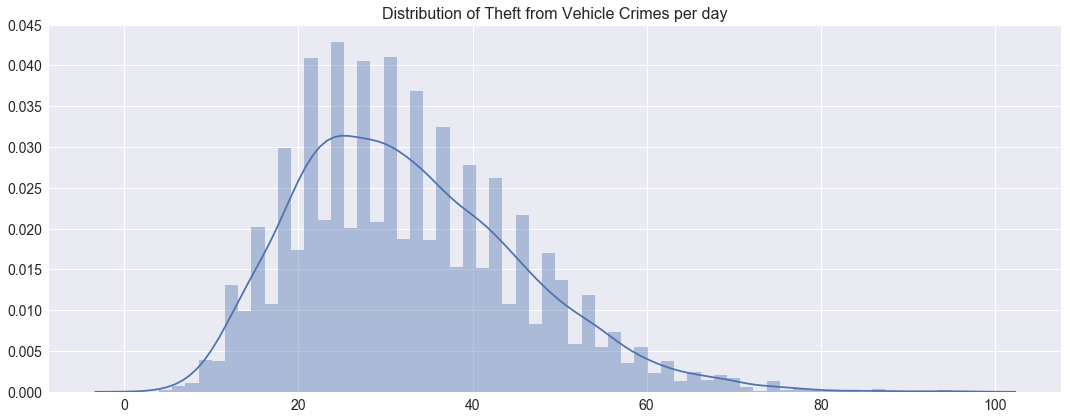

In [12]:
#Distribution of Crime
#Adpated from:http://benalexkeen.com/resampling-time-series-data-with-pandas/
plt.figure(figsize=(15,6))
plt.title('Distribution of Theft from Vehicle Crimes per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(crime.resample('D').size(), bins=60)
plt.tight_layout()
plt.savefig('distribution.png',dpi=100,alpha=True)

Q.Are there any outliers: days that standout

In [13]:
crime.resample('D').size().idxmax()

Timestamp('2003-05-16 00:00:00', freq='D')

In [14]:
crime.resample('D').size().idxmin()

Timestamp('2011-06-22 00:00:00', freq='D')

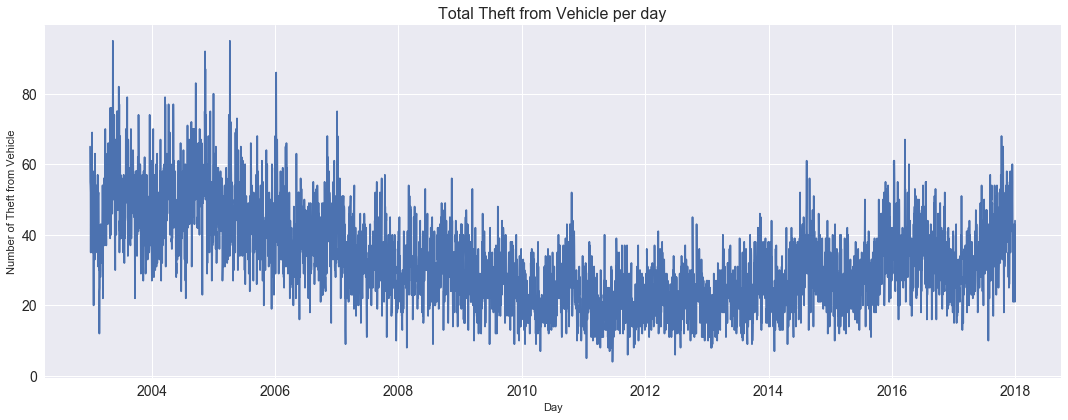

In [15]:
# 2003-05-16 had a large number of occurrences
# Adapted from https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/

plt.figure(figsize=(15,6))
crime.resample('D').size().plot(label='Theft from Vehicle day')
plt.title('Total Theft from Vehicle per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of Theft from Vehicle')
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('Theftperdaytime.png',dpi=100,alpha=True)

In [16]:
# Outlier date 2003-05-16 max
len(crime['2003-05-16'])

95

In [17]:
# outlier date 2011-06
len(crime['2011-06-22'])

4

In [18]:
#What neighbourhood
crime['2003-05-16']['NEIGHBOURHOOD'].value_counts().head(24)

Central Business District    40
West End                     12
Fairview                      7
Oakridge                      5
Mount Pleasant                4
Stanley Park                  3
Kensington-Cedar Cottage      3
Musqueam                      2
Hastings-Sunrise              2
Renfrew-Collingwood           2
Kerrisdale                    2
Strathcona                    2
Sunset                        2
West Point Grey               2
Killarney                     2
Dunbar-Southlands             1
Riley Park                    1
Shaughnessy                   1
Marpole                       1
Arbutus Ridge                 1
Name: NEIGHBOURHOOD, dtype: int64

In [19]:
crime['2003-05-16']['HOUR'].value_counts().head(24)

19.0    10
22.0     9
17.0     8
18.0     7
0.0      7
15.0     7
23.0     6
10.0     6
20.0     6
14.0     5
21.0     5
9.0      4
13.0     3
5.0      3
8.0      2
11.0     2
16.0     1
7.0      1
1.0      1
2.0      1
6.0      1
Name: HOUR, dtype: int64

Q. Which days have the hights and lowest averge number of theft from vehicle?
Not include is the outliers

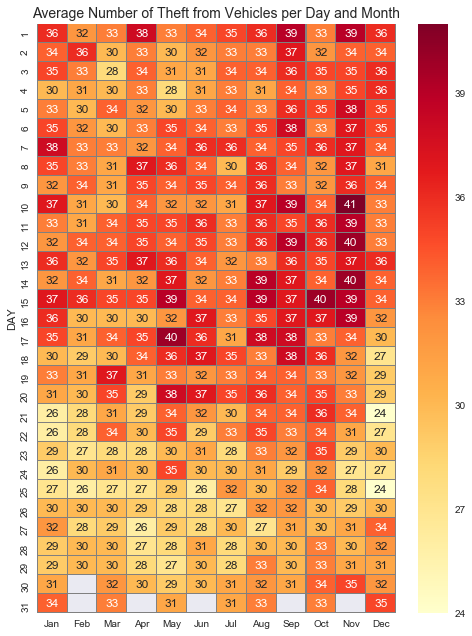

In [20]:

crimetble = crime[(crime['DATE'] != '2003-05-16')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimetble_year_count = crime[(crime['DATE'] != '2003-05-16')].pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crime_avg = crimetble/crimetble_year_count
crime_avg.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(7,9))
plt.title('Average Number of Theft from Vehicles per Day and Month', fontsize=14)
sns.heatmap(crime_avg.round(), cmap='YlOrRd', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f");
plt.tight_layout()
plt.savefig('AverageDayMonthHeat',dpi=100,alpha=True)

Q. Is theft from vehicle decreasing?

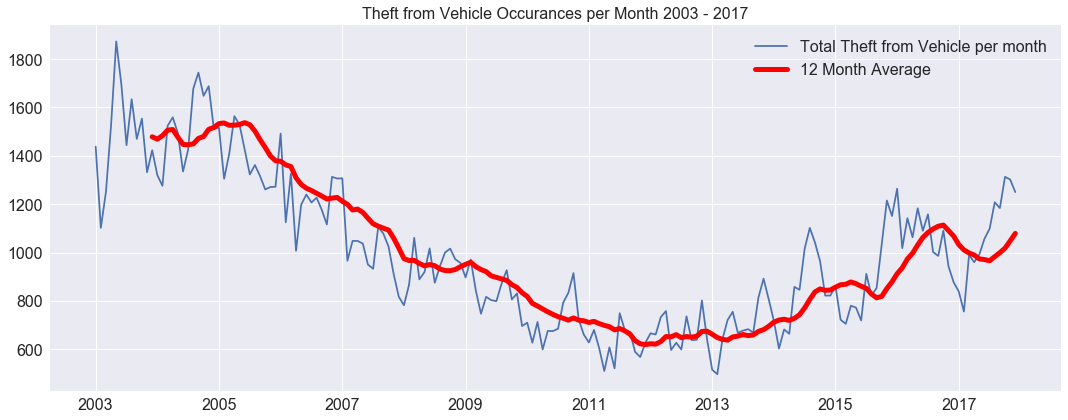

In [21]:
# 12 month average
plt.figure(figsize=(15,6))
crime.resample('M').size().plot(label='Total Theft from Vehicle per month')
crime.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12 Month Average')

plt.title('Theft from Vehicle Occurances per Month 2003 - 2017', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('perMonth.png',dpi=100,alpha=True)

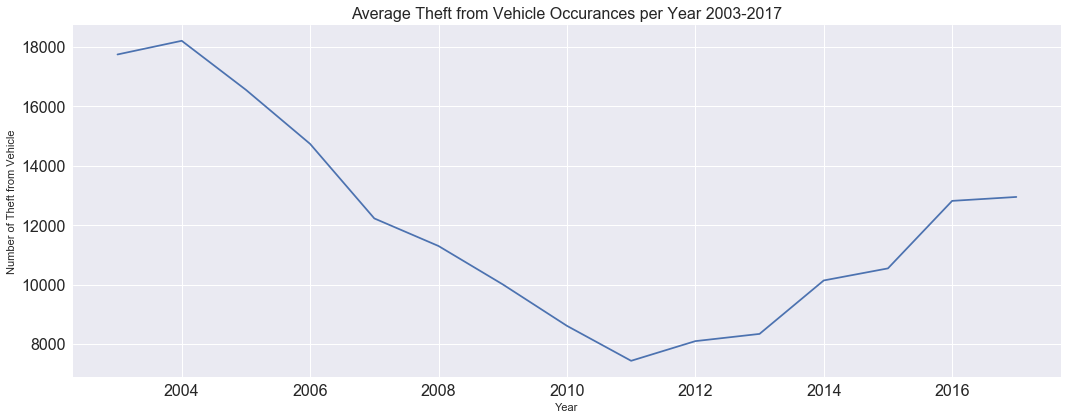

In [22]:
# Yearly average
plt.figure(figsize=(15,6))
crime.resample('Y').size().plot()
plt.title('Average Theft from Vehicle Occurances per Year 2003-2017', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Theft from Vehicle')

plt.tick_params(labelsize=16);
plt.tight_layout()
plt.savefig('perYearline.png',dpi=100,alpha=True)

Q. When time during the week does most theft from vehicle occure?

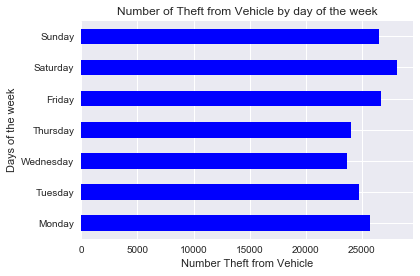

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crime.groupby([crime.index.dayofweek]).size().plot(kind='barh', color ='b')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number Theft from Vehicle')
plt.title('Number of Theft from Vehicle by day of the week')
plt.tight_layout()
plt.savefig('DayWKBAr.png',dpi=100,alpha=True)
plt.show()

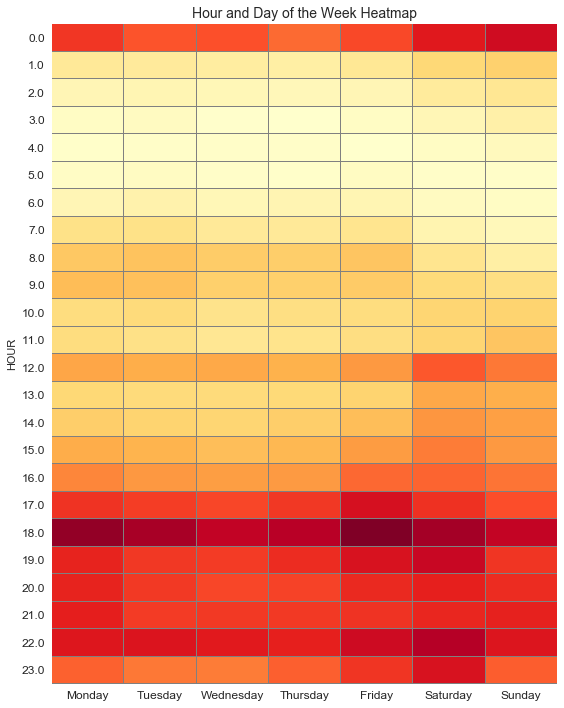

In [24]:

crimetbl = crime.pivot_table(values='TYPE', index='HOUR', columns='DAY_WK', aggfunc=len)
#print(crime_tbl)
crimetbl.columns= days
plt.figure(figsize=(8,10))
plt.title('Hour and Day of the Week Heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimetbl, cmap='YlOrRd', linecolor='grey',linewidths=0.1, cbar=False);
plt.tight_layout()
plt.savefig('HourDayHeatmap.png',dpi=100,alpha=True)

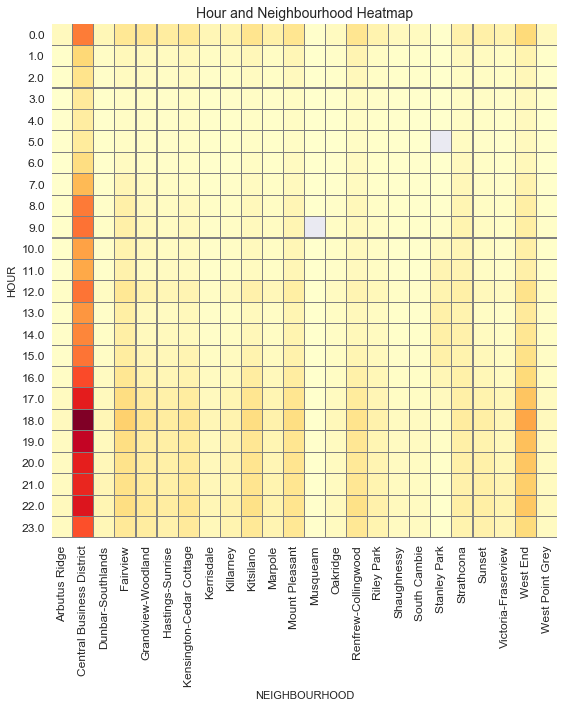

In [25]:
# Neighbourhood by hour 
crimetbl = crime.pivot_table(values='TYPE', index='HOUR', columns = 'NEIGHBOURHOOD', aggfunc=len)
#print(crime_tbl)
plt.figure(figsize=(8,10))
plt.title('Hour and Neighbourhood Heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimetbl, cmap='YlOrRd', linecolor='grey',linewidths=0.1, cbar=False);
plt.tight_layout()
plt.savefig('HourNeighbourhoodHeatmap.png',dpi=100,alpha=True)

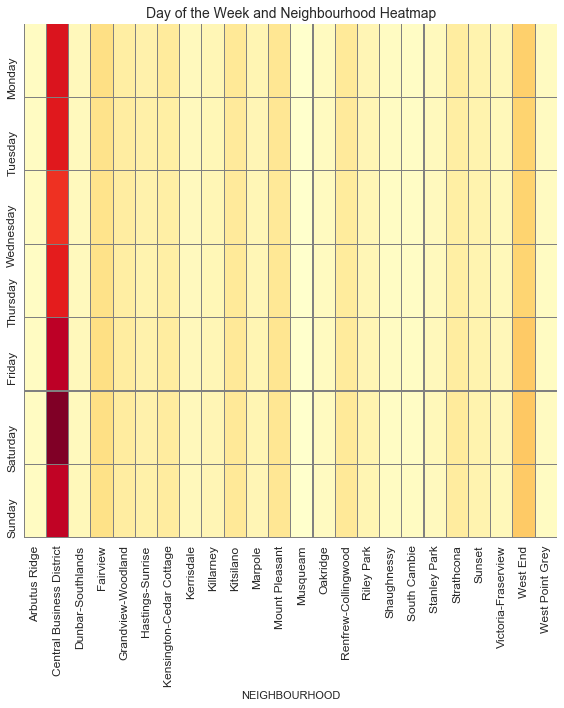

In [26]:
crimetbl = crime.pivot_table(values='TYPE', index='DAY_WK', columns='NEIGHBOURHOOD', aggfunc=len)
#print(crime_tbl)
crimetbl.index= days
plt.figure(figsize=(8,10))
plt.title('Day of the Week and Neighbourhood Heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimetbl, cmap='YlOrRd', linecolor='grey',linewidths=0.1, cbar=False)
plt.tight_layout()
plt.savefig('DayWKNeighbourhoodHeatmap.png',dpi=100,alpha=True)

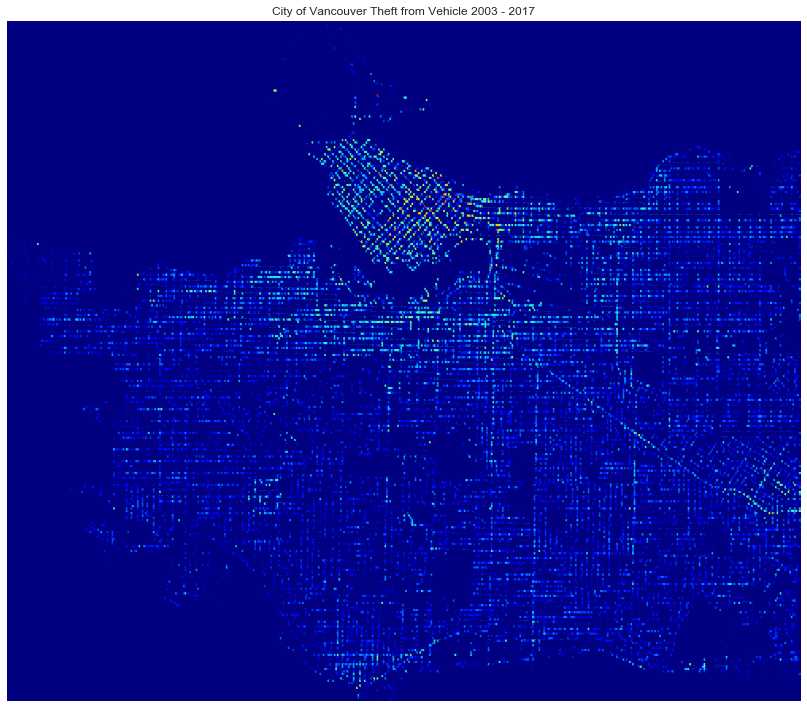

In [27]:
#Adapted from https://media.readthedocs.org/pdf/basemaptutorial/latest/basemaptutorial.pdf
# and
#https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.W2MpbthKjOQ

east, west = crime["LONG"].max(),crime["LONG"].min()
north, south = crime["LAT"].max(),crime["LAT"].min()

fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("City of Vancouver Theft from Vehicle 2003 - 2017")

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
x, y = m(crime['LONG'].values, crime['LAT'].values)
m.hexbin(x, y, gridsize=500,bins='log', cmap='jet')
plt.tight_layout()
plt.savefig('basemap2003-2017.png',dpi=100,alpha=True)

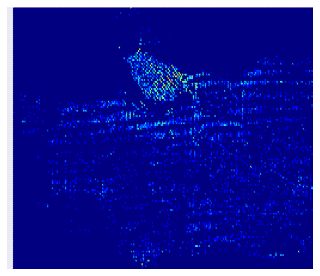

In [28]:
#2003 
x, y = m(crime[crime['YEAR'] == 2003]['LONG'].values, crime[crime['YEAR'] == 2003]['LAT'].values)
m.hexbin(x, y, gridsize=250, bins='log', cmap='jet')
ax.set_title("2003 Theft from Vehicle")
plt.tight_layout()
plt.savefig('basemap2003.png',dpi=100,alpha=True)


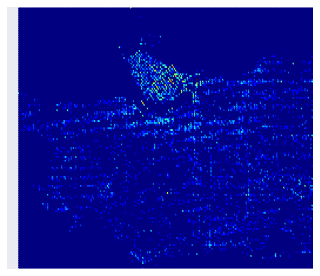

In [29]:
#2004 spike
x, y = m(crime[crime['YEAR'] == 2004]['LONG'].values, crime[crime['YEAR'] == 2004]['LAT'].values)
ax.set_title("2004 Theft from Vehicle")
m.hexbin(x, y, gridsize=250, bins='log', cmap='jet')
plt.tight_layout()
plt.savefig('basemap2004.png',dpi=100,alpha=True)


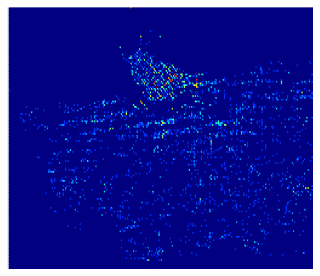

In [30]:
#2011 there was a drop
x, y = m(crime[crime['YEAR'] == 2011]['LONG'].values, crime[crime['YEAR'] == 2011]['LAT'].values)
ax.set_title("2011 Theft from Vehicle")
m.hexbin(x, y, gridsize=250, bins='log', cmap='jet')
plt.tight_layout()
plt.savefig('basemap2011.png',dpi=100,alpha=True)


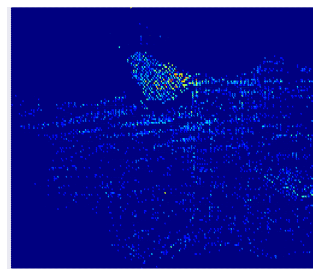

In [31]:
#2017 going back up
x, y = m(crime[crime['YEAR'] == 2017]['LONG'].values, crime[crime['YEAR'] == 2017]['LAT'].values)
ax.set_title("2017 Theft from Vehicle ")
m.hexbin(x, y, gridsize=250, bins='log', cmap='jet')
plt.tight_layout()
plt.savefig('basemap2017.png',dpi=100,alpha=True)
